<a href="https://colab.research.google.com/github/LoniQin/deep_learning_notebooks/blob/master/tensorflow/English_Handwritten_Characters_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This dataset contains 3,410 images of handwritten characters in English. This is a classification dataset that can be used for Computer Vision tasks. It contains 62 classes with 55 images of each class. The 62 classes are 0-9, A-Z and a-z. You can download this dataset from [this website](https://www.kaggle.com/dhruvildave/english-handwritten-characters-dataset)

## Import Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

## Define some common parameters

In [ ]:
base_path = "/kaggle/input/english-handwritten-characters-dataset/"
image_width = 96
image_height = 72


## Load data

In [ ]:
df = pd.read_csv(base_path + "english.csv")
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [ ]:
index_word = []
for i in range(0, 10):
    index_word.append(str(i))
for i in range(0, 26):
    index_word.append(chr(65 + i))
for i in range(0, 26):
    index_word.append(chr(97 + i))
print(index_word)
word_index = {index_word[i]: i for i in range(0, len(index_word))}
print(word_index)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}


In [ ]:
items = []
for index, row in df.iterrows():
    if index % 100 == 0:
        print(index)
    path = base_path + row["image"]
    img = Image.open(path).convert('L').resize((image_width, image_height))
    items.append((np.array(img), word_index[row["label"]]))
np.random.shuffle(items)
print(items[1][0].shape)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
(72, 96)


## Plot a image and its label from dataset

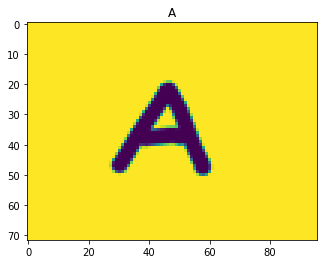

In [ ]:
index = np.random.randint(len(items))
plt.title(index_word[items[index][1]])
plt.imshow(items[index][0])
plt.show()

In [ ]:
xs = []
ys = []
for item in items:
    xs.append(item[0])
    ys.append(item[1])
images = np.array(xs).reshape(len(xs), image_width, image_height, 1) / 255.0
labels = np.array(ys)
print(images.shape)
print(labels.shape)

(3410, 96, 72, 1)
(3410,)


## Split the data to training and testing set

In [ ]:
training_images, testing_images = train_test_split(images, test_size=0.1)
print(training_images.shape)
print(testing_images.shape)

(3069, 96, 72, 1)
(341, 96, 72, 1)


In [ ]:
training_labels, testing_labels = train_test_split(labels, test_size=0.1)
print(training_labels.shape)
print(testing_labels.shape)

(3069,)
(341,)


## Define model

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(image_width, image_height, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(62, activation='softmax')
])

## Display summary of the model

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 94, 70, 16)        160       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 47, 35, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 47, 35, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 45, 33, 64)        9280      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 16, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 22, 16, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 22528)           

## Compile the model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    verbose=2
)

## Train data

In [ ]:
history = model.fit(training_images, training_labels, epochs=100, validation_split=0.1)

Epoch 1/100
87/87 [==============================] - 1s 6ms/step - loss: 0.1406 - accuracy: 0.9569 - val_loss: 16.9745 - val_accuracy: 0.0261
Epoch 2/100
87/87 [==============================] - 1s 7ms/step - loss: 0.1494 - accuracy: 0.9551 - val_loss: 17.1281 - val_accuracy: 0.0261
Epoch 3/100
87/87 [==============================] - 1s 6ms/step - loss: 0.1540 - accuracy: 0.9537 - val_loss: 17.4789 - val_accuracy: 0.0326
Epoch 4/100
87/87 [==============================] - 0s 5ms/step - loss: 0.1360 - accuracy: 0.9555 - val_loss: 17.0594 - val_accuracy: 0.0391
Epoch 5/100
87/87 [==============================] - 0s 5ms/step - loss: 0.1508 - accuracy: 0.9537 - val_loss: 17.0430 - val_accuracy: 0.0261
Epoch 6/100
87/87 [==============================] - 0s 5ms/step - loss: 0.1283 - accuracy: 0.9605 - val_loss: 17.1204 - val_accuracy: 0.0293
Epoch 7/100
87/87 [==============================] - 0s 5ms/step - loss: 0.1354 - accuracy: 0.9587 - val_loss: 17.2411 - val_accuracy: 0.0326
Epoch 

87/87 [==============================] - 0s 5ms/step - loss: 0.1059 - accuracy: 0.9656 - val_loss: 19.0169 - val_accuracy: 0.0326
Epoch 59/100
87/87 [==============================] - 0s 5ms/step - loss: 0.0904 - accuracy: 0.9685 - val_loss: 18.9493 - val_accuracy: 0.0261
Epoch 60/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0815 - accuracy: 0.9739 - val_loss: 19.5281 - val_accuracy: 0.0195
Epoch 61/100
87/87 [==============================] - 0s 5ms/step - loss: 0.0856 - accuracy: 0.9761 - val_loss: 19.0927 - val_accuracy: 0.0261
Epoch 62/100
87/87 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 0.9743 - val_loss: 19.0018 - val_accuracy: 0.0195
Epoch 63/100
87/87 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 0.9772 - val_loss: 19.2822 - val_accuracy: 0.0293
Epoch 64/100
87/87 [==============================] - 0s 5ms/step - loss: 0.0855 - accuracy: 0.9728 - val_loss: 19.2135 - val_accuracy: 0.0228
Epoch 65/100

## Evaluate data

In [ ]:
result = model.evaluate(testing_images, testing_labels)
print(result)

11/11 [==============================] - 0s 3ms/step - loss: 21.1610 - accuracy: 0.0264
[21.1610164642334, 0.026392962783575058]


## Plot the learning curve

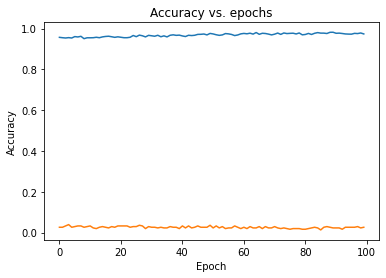

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

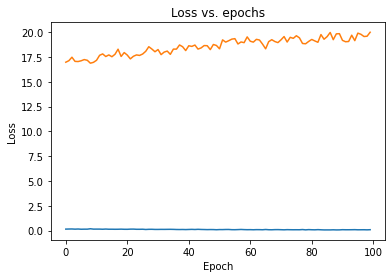

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Conclusion

I managed to build a model to learn from this dataset although it overfits. There are many possible root causes:  
- Number of samples are too small, so it don't cover most senarios.
- Every character is fit in a image with a large white background, so it makes the neural network harder to discover its pattern.
- The neural network and its hyper parameters is not very suitable for this dataset.

There can be some solutions to solve this problem:
- Add more real samples with more senarios.
- Use data augmentation.
- Write some algorithm to search the location of character.
- Define a better architecture to learn from this dataset.